In [1]:
import numpy as np
import os
path = './log/'
!ls $path

20210407_2318.log  20210413_0545.log  20210414_2344.log  20210416_0757.log
20210412_0102.log  20210414_0103.log  20210414_2345.log  20210419_0306.log
20210412_0103.log  20210414_0105.log  20210415_0040.log  20210419_0314.log
20210413_0343.log  20210414_2259.log  20210415_0041.log  20210422_0809.log
20210413_0346.log  20210414_2301.log  20210416_0756.log


In [32]:
import matplotlib.pyplot as plt
import matplotlib
def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

def plot(content, smooth_radius=10,):
    avg_len_l = []
    avg_r_l = []
    frame_l = []
    for i, x in enumerate(content):
        if i < 32:
            print(x[:-1])  # remove the last '\n'
        if 'Frame:' in x:
            try:
                avg_len = float(x.split('Avg. Length:')[-1])
            except:
                avg_len = 0
            avg_len_l.append(avg_len)
            avg_r = float(x.split('Avg. Reward:')[-1].split(',')[0])
            avg_r_l.append(avg_r)
            frame = float(x.split('Frame:')[-1].split(',')[0])
            frame_l.append(frame)
    fig, axs = plt.subplots(2, figsize=(6, 6))
    axs[0].plot(frame_l, smooth(avg_r_l, radius=smooth_radius))
    axs[0].set_xlabel('Frame')
    axs[0].set_ylabel('Avg. Reward')
    axs[1].plot(frame_l, smooth(avg_len_l, radius=smooth_radius))
    axs[1].set_xlabel('Frame')
    axs[1].set_ylabel('Avg. Length')
    axs[0].grid()
    axs[1].grid()
    print(len(avg_len_l))


                          Options
                          seed: 1122
                          batch_size: 32
                          no_cuda: False
                          max_frames: 10000000
                          buffer_size: 100000
                          update_target: 1000
                          train_freq: 1
                          gamma: 0.99
                          eta: 0.1
                          rl_start: 10000
                          sl_start: 1000
                          hidden_dim: 256
                          dueling: False
                          multi_step: 1
                          env: SlimeVolley-v0
                          negative: False
                          load_model: None
                          save_model: model
                          evaluate: False
                          render: False
                          evaluation_interval: 10000
                          lr: 0.0001
                          max_tag_interval

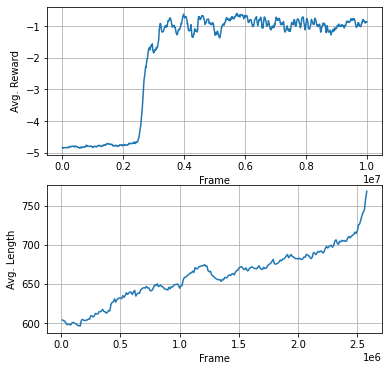

In [33]:
filename = '20210414_0105.log'

f = open(os.path.join(path, filename), "r")
content = f.readlines()

plot(content)


                          Options
                          seed: 1122
                          batch_size: 32
                          no_cuda: False
                          max_frames: 30000000
                          buffer_size: 100000
                          update_target: 1000
                          train_freq: 1
                          gamma: 0.99
                          eta: 0.1
                          rl_start: 10000
                          sl_start: 1000
                          hidden_dim: 512
                          dueling: False
                          multi_step: 1
                          env: SlimeVolleyNoFrameskip-v0
                          negative: False
                          load_model: None
                          save_model: model
                          evaluate: False
                          render: False
                          evaluation_interval: 10000
                          lr: 0.0001
                          max_t

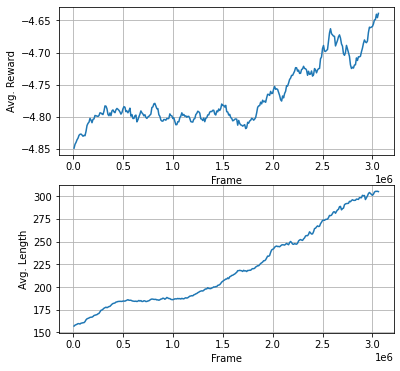

In [34]:
filename = '20210414_0103.log'

f = open(os.path.join(path, filename), "r")
content = f.readlines()

plot(content)


                          Options
                          seed: 1122
                          batch_size: 1024
                          no_cuda: False
                          max_frames: 500000000
                          buffer_size: 100000
                          update_target: 1000
                          train_freq: 100
                          gamma: 0.99
                          eta: 0.1
                          rl_start: 10000
                          sl_start: 1000
                          num_envs: 5
                          hidden_dim: 256
                          dueling: False
                          multi_step: 1
                          env: SlimeVolley-v0
                          ram: False
                          negative: False
                          against_baseline: True
                          load_model: None
                          save_model: model
                          evaluate: False
                          render: False
   

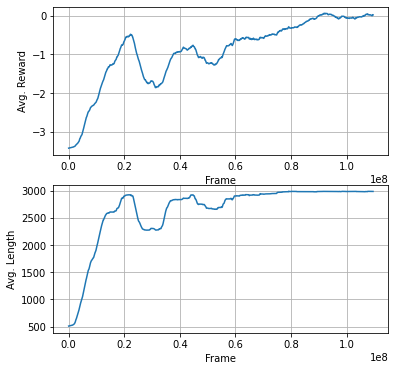

In [35]:
filename = '20210422_0809.log'

f = open(os.path.join(path, filename), "r")
content = f.readlines()

plot(content, smooth_radius=100)


                          Options
                          seed: 1122
                          batch_size: 256
                          no_cuda: False
                          max_frames: 1000000000
                          buffer_size: 100000
                          update_target: 1000
                          train_freq: 100
                          gamma: 0.99
                          eta: 0.1
                          rl_start: 10000
                          sl_start: 1000
                          num_envs: 1
                          hidden_dim: 256
                          dueling: False
                          multi_step: 1
                          env: SlimeVolley-v0
                          ram: False
                          negative: False
                          against_baseline: True
                          load_model: None
                          save_model: model
                          evaluate: False
                          render: False
   

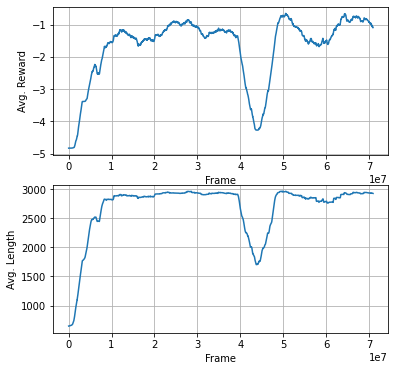

In [36]:
filename = '20210422_0658.log'

f = open(os.path.join(path, filename), "r")
content = f.readlines()

plot(content, smooth_radius=200)
